In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explore the dataset

In [2]:
df = pd.read_csv('../input/diabets/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**All the numbers are numerical values which can be used for analysis without treatment of data types**

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***The columns Glucose, Blood Pressure, Skin Thickness, Insulin and BMI have zero values which does not make sense.
Let's replace them with appropriate central value.***

In [6]:
df.Glucose.value_counts()[0], df.BloodPressure.value_counts()[0], df.SkinThickness.value_counts()[0], df.Insulin.value_counts()[0], df.BMI.value_counts()[0]

(5, 35, 227, 374, 11)

### First replace the zero values with nan so it does not affect the central value

In [7]:
df.Glucose.replace(0, np.nan, inplace=True), df.BloodPressure.replace(0, np.nan, inplace=True), df.SkinThickness.replace(0, np.nan, inplace=True), df.Insulin.replace(0, np.nan, inplace=True), df.BMI.replace(0, np.nan, inplace=True)

(None, None, None, None, None)

In [8]:
df.replace(np.nan, {'Glucose': df.Glucose.median(), 'BloodPressure': df.BloodPressure.median(), 'SkinThickness': df.SkinThickness.median(), 'Insulin': df.Insulin.median(), 'BMI': df.BMI.median()}, inplace=True)

### Check the distribution of data for all columns using Histograms

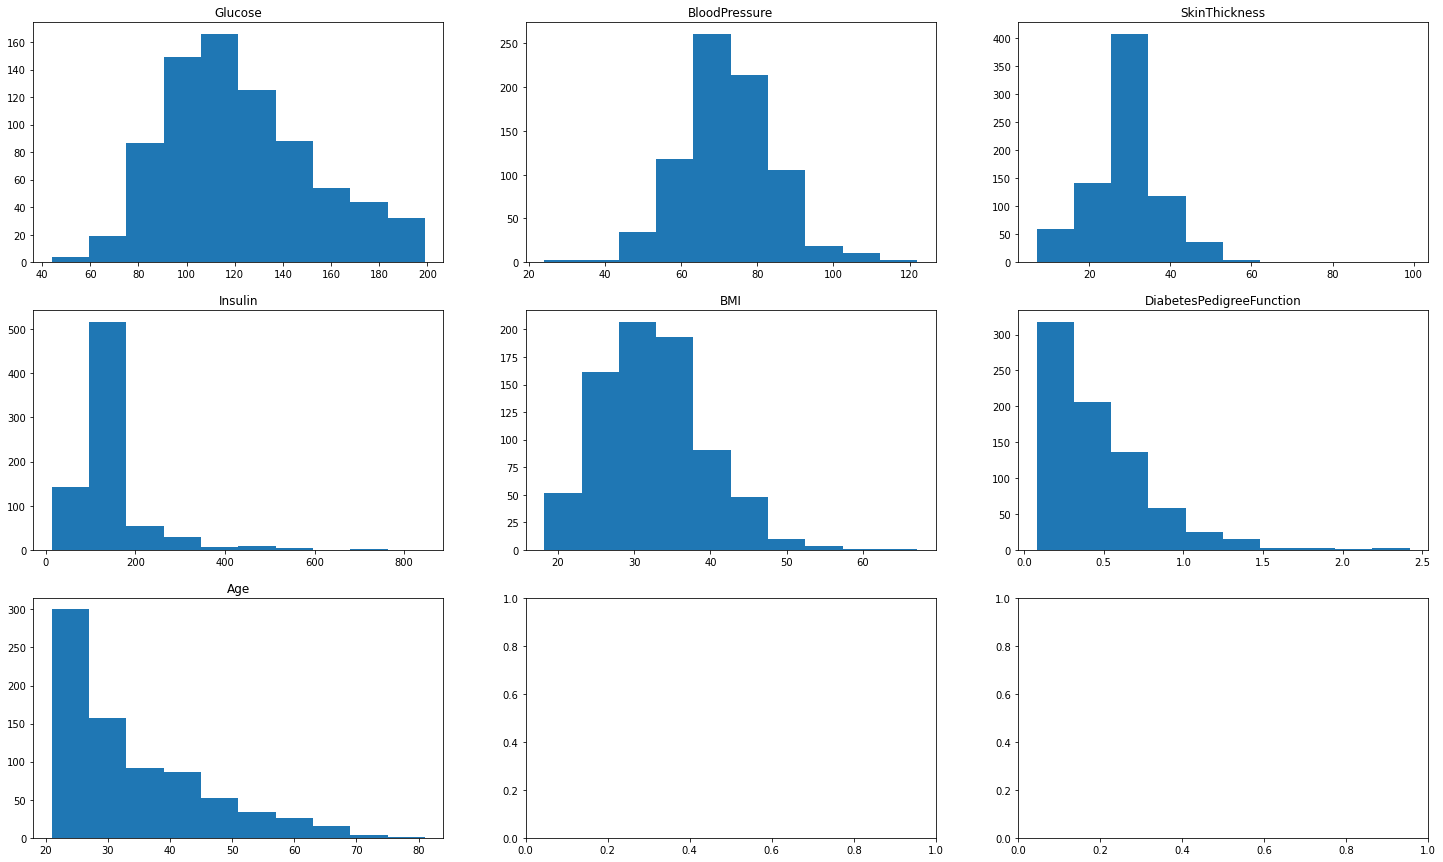

In [9]:
fig, axs = plt.subplots(3,3, figsize=(25,15))

axs[0,0].hist(df.Glucose)
axs[0,0].set_title('Glucose')
axs[0,1].hist(df.BloodPressure)
axs[0,1].set_title('BloodPressure')
axs[0,2].hist(df.SkinThickness)
axs[0,2].set_title('SkinThickness')
axs[1,0].hist(df.Insulin)
axs[1,0].set_title('Insulin')
axs[1,1].hist(df.BMI)
axs[1,1].set_title('BMI')
axs[1,2].hist(df.DiabetesPedigreeFunction)
axs[1,2].set_title('DiabetesPedigreeFunction')
axs[2,0].hist(df.Age)
axs[2,0].set_title('Age')

plt.show()

### Now, let's compare the histograms based on the Outcome column

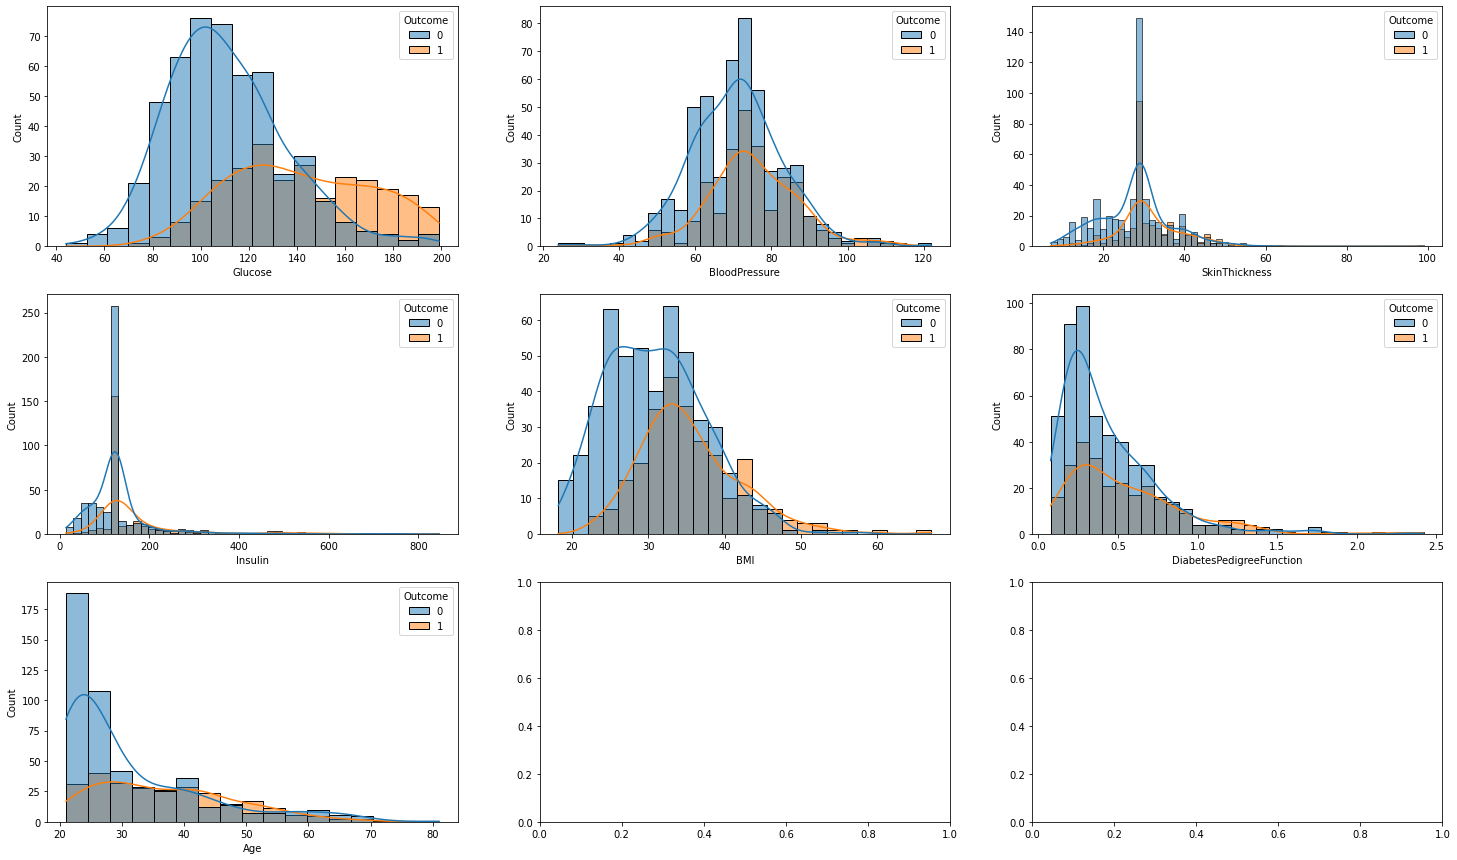

In [10]:
fig, axs = plt.subplots(3,3, figsize=(25,15))

sns.histplot(data=df, x='Glucose', hue='Outcome', ax=axs[0,0], kde=True)
sns.histplot(data=df, x='BloodPressure', hue='Outcome', ax=axs[0,1], kde=True)
sns.histplot(data=df, x='SkinThickness', hue='Outcome', ax=axs[0,2], kde=True)
sns.histplot(data=df, x='Insulin', hue='Outcome', ax=axs[1,0], kde=True, bins=50)
sns.histplot(data=df, x='BMI', hue='Outcome', ax=axs[1,1], kde=True)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', ax=axs[1,2], kde=True)
sns.histplot(data=df, x='Age', hue='Outcome', ax=axs[2,0], kde=True)


plt.show()

### Check if all columns have the equal data points

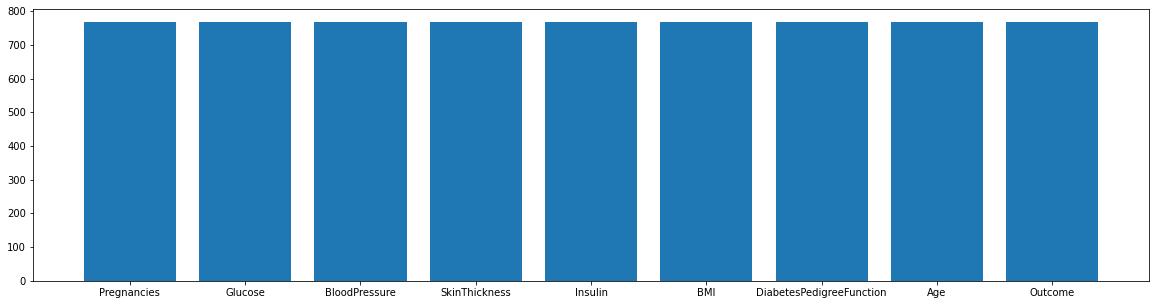

In [11]:
column_counts = df.count()
column_types = df.dtypes

plt.figure(figsize=(20,5))
plt.bar(x=column_counts.index, height=column_counts.values)

plt.show()

### Check Balance of the data

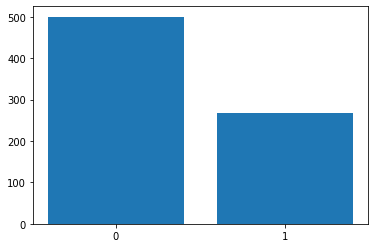

In [12]:
outcome_counts = df.Outcome.value_counts()

plt.bar(outcome_counts.index, outcome_counts.values, tick_label=[0,1])

plt.show()

***The Outcome is imbalanced, might need oversampling***

### The below pairplot will provide sense of data distribution

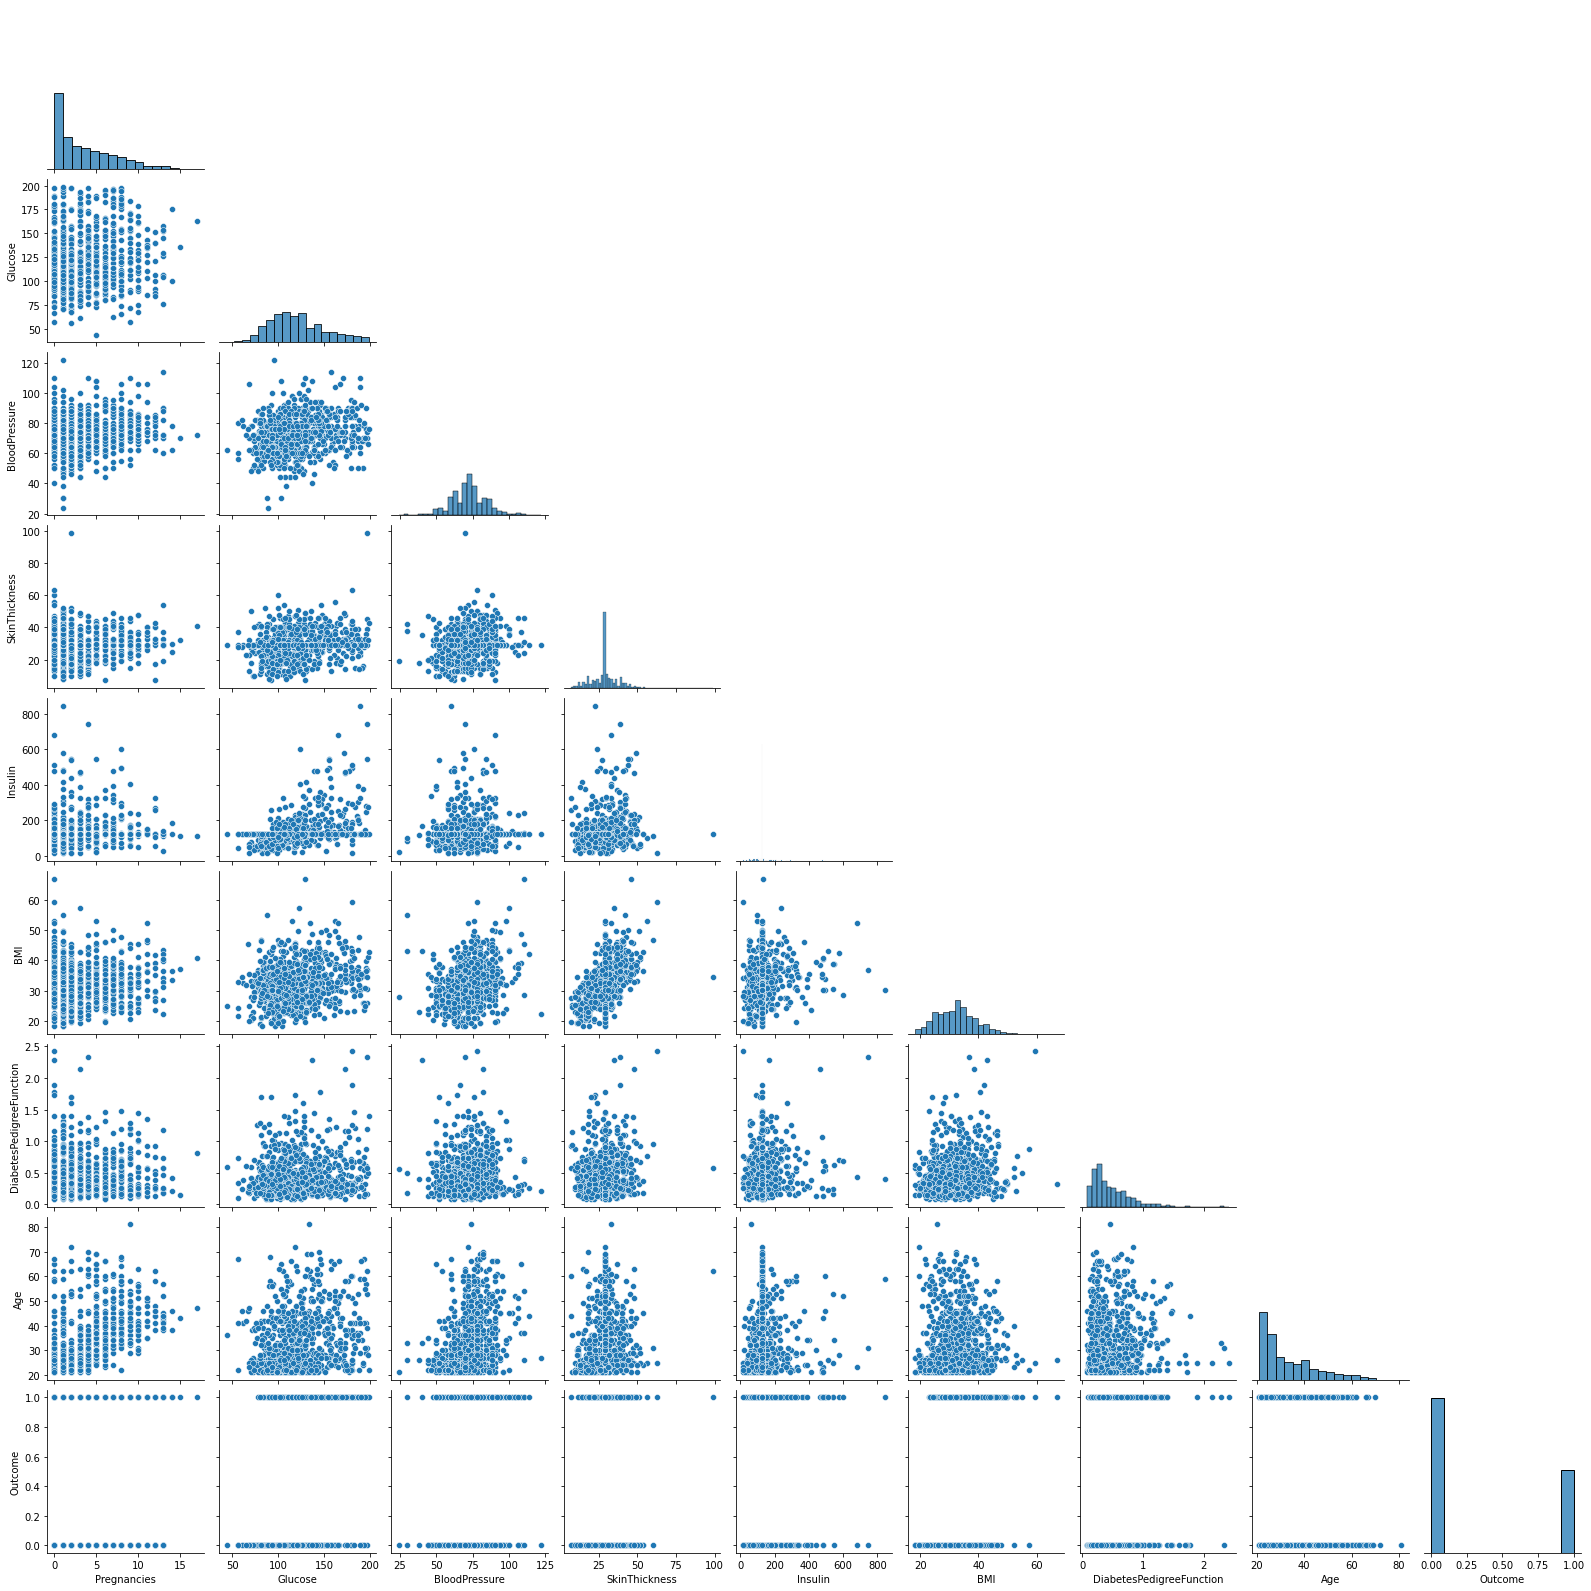

In [13]:
sns.pairplot(df, corner=True)

plt.show()

### Check for multicollinearity via correlation table and heatmap

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


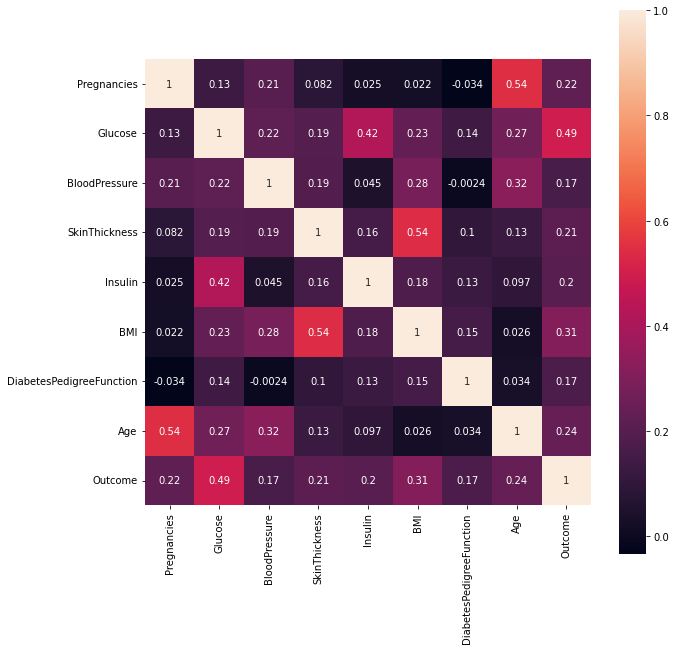

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, annot=True)

plt.show()

***No signicant correlation so no need to drop any column***

# 2. Prepare the dataset for model building

In [16]:
X = df.drop(labels='Outcome', axis=1)
y = df['Outcome']

### Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X, y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Use systematic minority oversampling technique to balance the dataset and scale it

In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
X_train_smt.shape, y_train_smt.shape


((800, 8), (800,))

# 3. Build various different types of models

### a. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_smt, y_train_smt)
y_test_pred_logreg = logreg.predict(X_test)
y_train_pred_logreg = logreg.predict(X_train)

In [21]:
from sklearn import metrics

In [22]:
print( f'Recall Score for Logistic Regression model: {metrics.recall_score(y_test, y_test_pred_logreg).round(2)} \nPrecision Score for Logistic Regression model: {metrics.precision_score(y_test, y_test_pred_logreg).round(2)} \nAccuracy Score for Logistic Regression model: {metrics.accuracy_score(y_test, y_test_pred_logreg).round(2)} \nF1 Score for Logistic Regression model: {metrics.f1_score(y_test, y_test_pred_logreg).round(2)}, \nROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_logreg)}')

Recall Score for Logistic Regression model: 0.65 
Precision Score for Logistic Regression model: 0.67 
Accuracy Score for Logistic Regression model: 0.77 
F1 Score for Logistic Regression model: 0.66, 
ROC AUC Score: 0.739074074074074


In [23]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_logreg))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_logreg))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.65      0.66        54

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       400
           1       0.65      0.71      0.68       214

    accuracy                           0.76       614
   macro avg       0.74      0.75      0.75       614
weighted avg       0.77      0.76      0.77       614



In [24]:
metrics.confusion_matrix(y_test, y_test_pred_logreg)

array([[83, 17],
       [19, 35]])

In [25]:
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_logreg)}')

ROC AUC Score: 0.739074074074074


### b. KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_smt, y_train_smt)
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

In [27]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_knn))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_knn))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       400
           1       0.69      0.92      0.79       214

    accuracy                           0.83       614
   macro avg       0.82      0.85      0.82       614
weighted avg       0.86      0.83      0.83       614



In [28]:
metrics.confusion_matrix(y_test, y_test_pred_knn)

array([[74, 26],
       [15, 39]])

In [29]:
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_knn)}')

ROC AUC Score: 0.7311111111111112


### c. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_smt, y_train_smt)
y_test_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)

In [31]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_rfc))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_rfc))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [32]:
print(metrics.confusion_matrix(y_test, y_test_pred_rfc))
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_rfc)}')

[[84 16]
 [20 34]]
ROC AUC Score: 0.7348148148148149


### d. Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train_smt, y_train_smt)
y_test_pred_nbc = nbc.predict(X_test)
y_train_pred_nbc = nbc.predict(X_train)

In [34]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_nbc))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_nbc))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       400
           1       0.64      0.67      0.65       214

    accuracy                           0.75       614
   macro avg       0.73      0.73      0.73       614
weighted avg       0.75      0.75      0.75       614



In [35]:
print(metrics.confusion_matrix(y_test, y_test_pred_nbc))
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_nbc)}')

[[83 17]
 [20 34]]
ROC AUC Score: 0.7298148148148148


### e. SVM Classifier

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smt, y_train_smt)
y_test_pred_svc = nbc.predict(X_test)
y_train_pred_svc = nbc.predict(X_train)

In [37]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_svc))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_svc))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       400
           1       0.64      0.67      0.65       214

    accuracy                           0.75       614
   macro avg       0.73      0.73      0.73       614
weighted avg       0.75      0.75      0.75       614



In [38]:
print(metrics.confusion_matrix(y_test, y_test_pred_svc))
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_svc)}')

[[83 17]
 [20 34]]
ROC AUC Score: 0.7298148148148148


### f. Ada Boost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train_smt, y_train_smt)
y_test_pred_adb = adb.predict(X_test)
y_train_pred_adb = adb.predict(X_train)

In [40]:
print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_adb))
print('---------------------------------------------------------------------------------')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_adb))

 Test Data Report 
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.67      0.69      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

---------------------------------------------------------------------------------
 Train Data Report 
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       400
           1       0.71      0.81      0.76       214

    accuracy                           0.82       614
   macro avg       0.80      0.82      0.81       614
weighted avg       0.83      0.82      0.82       614



In [41]:
print(metrics.confusion_matrix(y_test, y_test_pred_adb))
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_adb)}')

[[82 18]
 [17 37]]
ROC AUC Score: 0.7525925925925926


### Compare the relative performances of the different models

In [42]:
def model_compare(y_test, **model_pred_dict):
    models_df = pd.DataFrame()
    for model in model_pred_dict.keys():
        precision = metrics.precision_score(y_test, model_pred_dict[model])
        recall = metrics.recall_score(y_test, model_pred_dict[model])
        f1_score = metrics.f1_score(y_test, model_pred_dict[model])
        roc_auc_score = metrics.roc_auc_score(y_test, model_pred_dict[model])
        
        models_df = models_df.append(pd.DataFrame({'Precision': precision,'Recall': recall, 'F1 Score' : f1_score, 'ROC AUC Score' : roc_auc_score}, index=[model]))
    models_df.transpose().plot(kind='bar', figsize=(20,10))
    return models_df
    plt.show()

In [43]:
model_pred_dict = {'KNN' : y_test_pred_knn, 'LogReg' : y_test_pred_logreg, 'RF' : y_test_pred_rfc,  'NB' : y_test_pred_nbc, 'SVM' : y_test_pred_svc, 'ADB' : y_test_pred_adb}

,Precision,Recall,F1 Score,ROC AUC Score
KNN,0.600000,0.722222,0.655462,0.731111
LogReg,0.673077,0.648148,0.660377,0.739074
RF,0.680000,0.629630,0.653846,0.734815
NB,0.666667,0.629630,0.647619,0.729815
SVM,0.666667,0.629630,0.647619,0.729815
ADB,0.672727,0.685185,0.678899,0.752593


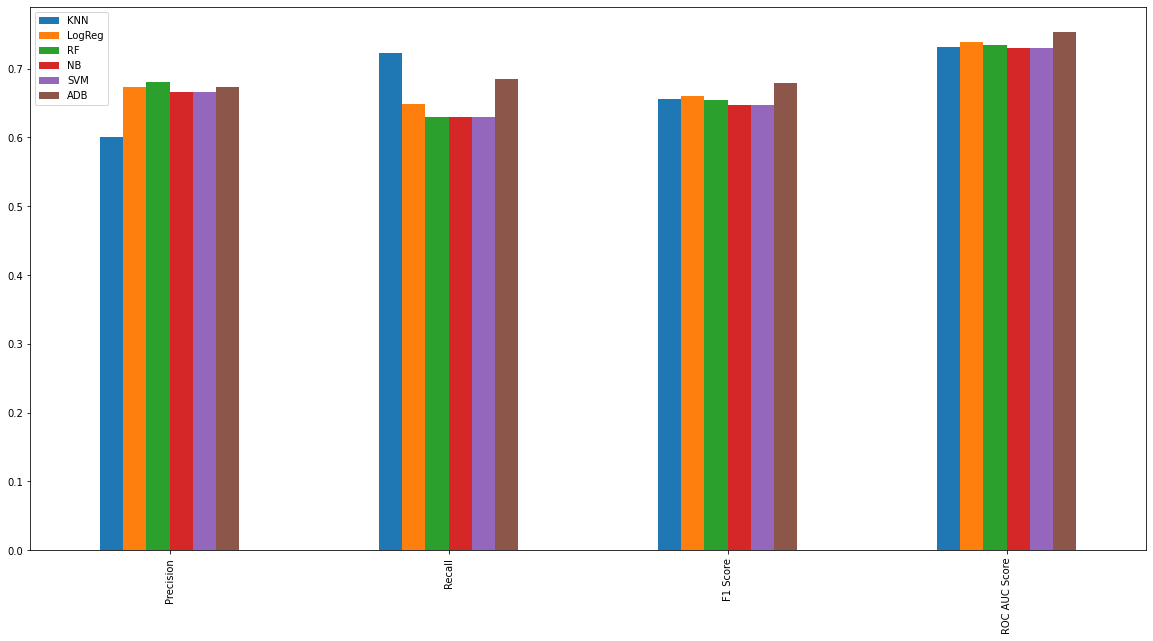

In [44]:
model_compare(y_test, **model_pred_dict)

# 4. Hyperparameter Tuning to improve various model's performance

In [45]:
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### a. Logistic Regression Tuning

In [46]:
param_logreg = {'penalty': ['l1', 'l2', 'elasticnet', 'none'] , 'solver' : ['newton-cg', 'lbfgs', 'liblinear'] ,'C' : 10**np.linspace(-3,3,50) , 'max_iter' : [1000]}

logreg_grid = GridSearchCV(LogisticRegression(), param_logreg, scoring='f1', n_jobs=-1, cv=5, verbose=0)

logreg_grid.fit(X_train_smt, y_train_smt)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-0...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [47]:
y_test_pred_logreg_grid = logreg_grid.predict(X_test)
y_train_pred_logreg_grid = logreg_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_logreg_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_logreg_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_logreg_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_logreg_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {logreg_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       400
           1       0.63      0.72      0.67       214

    accuracy                           0.75       614
   macro avg       0.73      0.75      0.74       614
weighted avg       0.76      0.75      0.76       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[81 19]
 [20 34]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.719

### b. KNN Tuning

In [48]:
param_knn = {'n_neighbors': range(3,10) , 'weights' : ['uniform', 'distance'] ,'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 'leaf_size' : [10,20,30,40,50], 'p' : [1,2,1.5]}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='f1', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

knn_grid.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': range(3, 10), 'p': [1, 2, 1.5],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1', verbose=1)

In [49]:
y_test_pred_knn_grid = knn_grid.predict(X_test)
y_train_pred_knn_grid = knn_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_knn_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_knn_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_knn_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_knn_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {knn_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[74 26]
 [15 39]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.731

### c. Random Forest Tuning

In [50]:
param_rf = {'n_estimators': [10,50,100] , 'criterion' : ['gini', 'entropy', 'log_loss'] ,'max_depth' : [5,10,15] , 'min_samples_split' : [2,3,4,5], 'min_samples_leaf' : [1,5,10], 'max_features' : ['sqrt', 'log2', 'None']}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=11), param_rf, scoring='f1', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

rf_grid.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2700 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/jobli

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='f1', verbose=1)

In [51]:
y_test_pred_rf_grid = rf_grid.predict(X_test)
y_train_pred_rf_grid = rf_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_rf_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_rf_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_rf_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_rf_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {rf_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       100
           1       0.67      0.67      0.67        54

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[82 18]
 [18 36]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.743

### d. Naive Bayes Tuning

In [52]:
param_nb = {'var_smoothing' : np.logspace(-9,0, num=10)}

nb_grid = GridSearchCV(GaussianNB(), param_nb, scoring='f1', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

nb_grid.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
             return_train_score=True, scoring='f1', verbose=1)

In [53]:
y_test_pred_nb_grid = nb_grid.predict(X_test)
y_train_pred_nb_grid = nb_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_nb_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_nb_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_nb_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_nb_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {nb_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       400
           1       0.64      0.67      0.65       214

    accuracy                           0.75       614
   macro avg       0.73      0.73      0.73       614
weighted avg       0.76      0.75      0.75       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[83 17]
 [20 34]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.729

### e. SVM Tuning

In [54]:
param_svm = {'C' : np.logspace(-3,2,20), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto']}

svm_grid = GridSearchCV(SVC(random_state=11), param_svm, scoring='f1', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

svm_grid.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=SVC(random_state=11), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1', verbose=1)

In [55]:
y_test_pred_svm_grid = svm_grid.predict(X_test)
y_train_pred_svm_grid = svm_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_svm_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_svm_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_svm_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_svm_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {svm_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       400
           1       0.88      0.96      0.92       214

    accuracy                           0.94       614
   macro avg       0.93      0.95      0.94       614
weighted avg       0.94      0.94      0.94       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[79 21]
 [29 25]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.626

### f. Adaboost Tuning

In [56]:
param_adb = {'n_estimators' : range(0,200,40), 'learning_rate': np.logspace(-2,1,10)}

adb_grid = GridSearchCV(AdaBoostClassifier(random_state=11), param_adb, scoring='f1', n_jobs=-1, cv=5, verbose=1, return_train_score=True)

adb_grid.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.7/sit

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=11), n_jobs=-1,
             param_grid={'learning_rate': array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]),
                         'n_estimators': range(0, 200, 40)},
             return_train_score=True, scoring='f1', verbose=1)

In [57]:
y_test_pred_adb_grid = adb_grid.predict(X_test)
y_train_pred_adb_grid = adb_grid.predict(X_train)

print('\033[1m Test Data Report \033[0m')
print(metrics.classification_report(y_test, y_test_pred_adb_grid))
print('---------------------------------------------------------------------------------\n')
print('\033[1m Train Data Report \033[0m')
print(metrics.classification_report(y_train, y_train_pred_adb_grid))
print('---------------------------------------------------------------------------------\n')
print(f'Confusion Matrix:\n {metrics.confusion_matrix(y_test, y_test_pred_adb_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'ROC AUC Score: {metrics.roc_auc_score(y_test, y_test_pred_adb_grid)}')
print('---------------------------------------------------------------------------------\n')
print(f'Best Params: {adb_grid.best_params_}')

 Test Data Report 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.66      0.78      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154

---------------------------------------------------------------------------------

 Train Data Report 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       400
           1       0.66      0.83      0.74       214

    accuracy                           0.79       614
   macro avg       0.78      0.80      0.78       614
weighted avg       0.81      0.79      0.80       614

---------------------------------------------------------------------------------

Confusion Matrix:
 [[78 22]
 [12 42]]
---------------------------------------------------------------------------------

ROC AUC Score: 0.778

,Precision,Recall,F1 Score,ROC AUC Score
KNN,0.600000,0.722222,0.655462,0.731111
LogReg,0.641509,0.629630,0.635514,0.719815
RF,0.666667,0.666667,0.666667,0.743333
NB,0.666667,0.629630,0.647619,0.729815
SVM,0.543478,0.462963,0.500000,0.626481
ADB,0.656250,0.777778,0.711864,0.778889


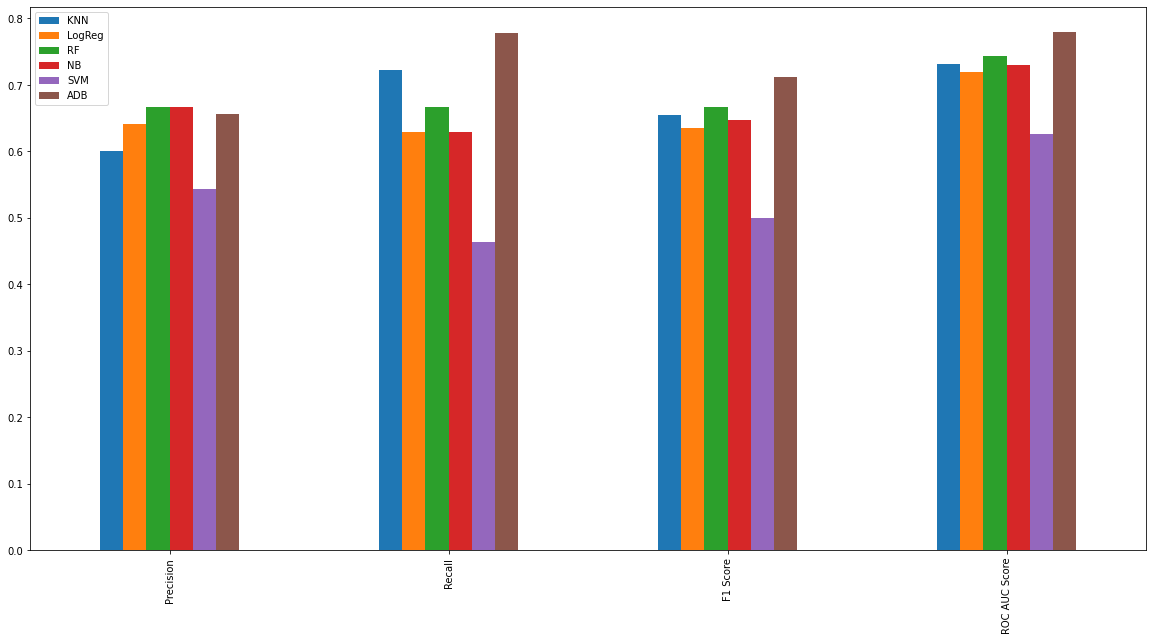

In [58]:
model_pred_dict_tuned = {'KNN' : y_test_pred_knn_grid, 'LogReg' : y_test_pred_logreg_grid, 'RF' : y_test_pred_rf_grid,  'NB' : y_test_pred_nb_grid, 'SVM' : y_test_pred_svm_grid, 'ADB' : y_test_pred_adb_grid}

model_compare(y_test, **model_pred_dict_tuned)

# 5. Conclusion:

**AdaBoost is the winning model.**